In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os



# I. About the dataset

We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

The calculations for data processing base on the **Manual Olade 2011**

## I.1 Load the dataset

In [47]:
# Load the file
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)


# Create a new dictionary to store modified dataframes
modified_dict = {}

for k, df in Dict.items():
    # Round the values of each column in the dataframe with 2 decimals
    df = df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

    # Ignore the first row (unit) in each df
    df = df.iloc[1:]

    # Rename columns in df
    df.rename(columns={'Unnamed: 0': 'SECTOR', 'OTHER PRIMARY_x000d_\n': 'OTHER PRIMARY'}, inplace=True)

    # Remove space in column names and Sector names
    df.columns = df.columns.str.strip()
    df['SECTOR'] = df['SECTOR'].str.strip()

    # Rename in a row
    df['SECTOR'].replace({'COKE PLANTS AND BLAST FURNACES_x000d_': 'COKE PLANTS AND BLAST FURNACES'}, inplace=True)
    
    # fill nule values
    df=df.fillna(np.nan)

    # Convert the keys of Dict to only contain the year
    k_new = k.split(' - ')[0]
    df["YEAR"] = k_new

    # Change all column names to uppercase
    df.columns = df.columns.str.upper()

    # Store the modified dataframe in the new dictionary
    modified_dict[k_new] = df

# Update the original dictionary with the modified dataframes
Dict = modified_dict


print(Dict.keys())

#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
    
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)



dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])


## I.2 Frist visualization of energy balance (Supply-Transformation-Adjustment-Consumption)

In [50]:
# Concatenate the data
for k in Dict.keys():    
     # Concatenate all DataFrames in Dict vertically
    df_concat = pd.concat(Dict.values(), ignore_index=True)
    df_concat.set_index("YEAR", inplace=True)
    df_concat.index = df_concat.index.astype(int)
    
df_concat.head(10)

,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,KEROSENE/JET FUEL,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL
YEAR,,,,,,,,,,,,,,,,,,,,,
1970,PRODUCTION,8161.58,1102.24,1044.43,3421.52,NaN,NaN,31851.53,3600.70,223.24,...,1307.21,5674.61,8399.23,55.18,1766.75,465.95,321.73,886.77,31068.07,49405.24
1970,IMPORT,17845.05,NaN,1358.47,NaN,NaN,NaN,NaN,NaN,NaN,...,8.19,NaN,NaN,72.42,NaN,NaN,NaN,368.92,937.48,20141.01
1970,EXPORT,65.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.91,47.15,748.34,NaN,NaN,NaN,NaN,NaN,920.12,985.17
1970,STOCK CHANGE,-277.33,NaN,-167.52,NaN,NaN,NaN,NaN,NaN,NaN,...,-54.86,-42.01,-69.03,-24.83,NaN,NaN,15.41,-53.93,-345.28,-790.13
1970,UNUSED,NaN,922.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55.88,50.45,NaN,106.33,1028.54
1970,TOTAL SUPPLY,25664.25,180.02,2235.39,3421.52,NaN,NaN,31851.53,3600.70,223.24,...,1137.63,5585.45,7581.86,102.77,1766.75,410.08,286.68,1201.77,30633.82,66742.40
1970,REFINERIES,-25535.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1307.21,5674.61,8399.23,NaN,NaN,NaN,261.90,886.77,24421.51,-1114.34
1970,POWER PLANTS,NaN,NaN,-454.51,-3302.28,NaN,NaN,NaN,NaN,NaN,...,NaN,-115.74,-652.61,NaN,NaN,NaN,NaN,NaN,3613.39,-911.74
1970,SELF-PRODUCERS,NaN,NaN,-9.59,-119.23,NaN,NaN,-12.70,-88.99,-81.16,...,NaN,-77.16,-329.53,NaN,NaN,-9.46,NaN,NaN,318.85,-408.96


### Show the data summary over years

In [53]:
# Group by Year and SECTOR, and sum the TOTAL values
selected_SECTORS=['TOTAL SUPPLY','TOTAL TRANSFORMATION','ADJUSTMENT','FINAL CONSUMPTION']
df_summary=df_concat.copy()

df_summary=df_summary.apply(lambda column: column.fillna(0))
df_summary=df_summary[df_summary['SECTOR'].isin(selected_SECTORS)]
df_summary = df_summary.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_summary = df_summary.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_summary = df_summary[selected_SECTORS]

# Display the result
display(df_summary)

SECTOR,TOTAL SUPPLY,TOTAL TRANSFORMATION,ADJUSTMENT,FINAL CONSUMPTION
YEAR,,,,
1970,66742.40,-5422.47,1.85,58834.12
1971,70092.03,-5437.72,4.11,61691.69
1972,75111.33,-5936.88,-29.62,65995.12
1973,81963.44,-6488.78,-17.64,71692.86
1974,87628.20,-6959.24,25.71,76198.40
1975,91211.72,-7818.10,111.74,78491.85
1976,95938.52,-7668.33,-66.91,83208.97
1977,99416.35,-8737.61,-201.10,85026.52
1978,105367.89,-9529.34,-102.43,88944.97


### Visualize the data summary

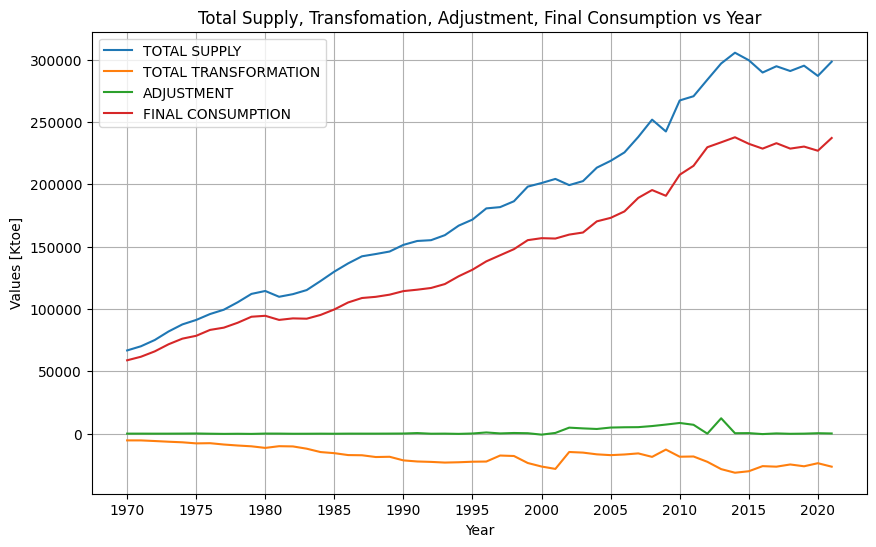

In [54]:
#selected_SECTORS=['TOTAL SUPPLY','TOTAL TRANSFORMATION','ADJUSTMENT','FINAL CONSUMPTION']
# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

#for k in selected_SECTORS:
 #   df_k=df_concat.loc[df_concat["SECTOR"]==k].drop(columns=["SECTOR"], axis=1)
  #  sns.lineplot(data=df_k, x=df_k.index, y='TOTAL', label=k, ax=ax)

for col in df_summary.columns:
    sns.lineplot(data=df_summary[col], x=df_summary.index, y=df_summary[col], label=col, ax=ax)
        
# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel(f'Values [Ktoe]')
ax.set_title(f'Total Supply, Transfomation, Adjustment, Final Consumption vs Year')
ax.set_xticks(df_concat.index.unique()[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()




The negative transformation values over  years typically means that more energy was consumed or transformed within the energy system than was produced or input into the system during that specific time period (year). In other words, it indicates an energy deficit or a situation where the energy demands and transformations within the system exceeded the energy available from primary sources or imports.

## I.3 Sankey Diagram

- Sankey diagrams are valuable tools for visualizing energy flows and understanding energy balances in complex systems. 

- Reviewing Sankey diagrams in an energy balance context is crucial for gaining insights into energy flows, identifying inefficiencies, ensuring a balance between supply and demand, and making informed decisions about energy policy, efficiency improvements, and environmental management. They provide a concise and visually intuitive representation of complex energy data, making it easier for stakeholders to understand and act upon energy-related challenges and opportunities.

In [55]:
from collections import defaultdict
import plotly.graph_objects as go

### Define the Plot function

In [56]:
# Defining the Plot function
def Plot(sheet_name, label, source, target, value):
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 30,
          thickness = 20,
          line = None, # dict(color = "black", width = 0.5),
          label = label,
          color = None # "blue"
        ),
        link = dict(
          source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = target,
          value = value
      ))])

    fig.update_layout(title_text=sheet_name, font_size=10)
    fig.show()

#### Preparation the data to plot

In [57]:
# Preparation the data to plot
def Data_Generate(Dict):
    
    Dict_out = {}  # Initialize the output dictionary
    for sheet_name in Dict.keys():

        df=Dict[sheet_name]
        
         # Reset index
        df=df.set_index('SECTOR')

        # Transpose df
        df=df.T

        # Fill NaN values
        df=df.fillna(np.nan)
        #df.fillna(0, inplace=True)

        # define the combinations
        Transformers=['REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
               'GAS PLANTS', 'CHARCOAL PLANTS', 'COKE PLANTS AND BLAST FURNACES',
               'DISTILLERIES', 'OTHER CENTERS']
        Primaries=['OIL','NATURAL GAS','COAL','HYDROENERGY','GEOTHERMAL','NUCLEAR','FIREWOOD','SUGARCANE AND PRODUCTS','OTHER PRIMARY']
        Secondaries=['ELECTRICITY','LPG','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL','COKE','CHARCOAL','GASES','OTHER SECONDARY']
        Consumptions=['TRANSPORT','INDUSTRIAL','RESIDENTIAL','COMMERCIAL, SERVICES, PUBLIC','AGRICULTURE, FISHING AND MINING','CONSTRUCTION AND OTHERS']

        unique_combinations = []

        # here add secondary combination then type of consumption combination

        for i in Transformers:
            for j in Primaries:
                unique_combinations.append((j, i,abs(df[i][j])))

        for i in Transformers:
            for j in Secondaries:
                unique_combinations.append((i, j,abs(df[i][j])))

        #get the final consumption column     

        for i in Primaries+Secondaries:
                unique_combinations.append((i, i+'-FINAL CONSUMPTION',abs(df['FINAL CONSUMPTION'][i])))

        # the final consumption column - Usage column
        for i in Primaries+Secondaries:
            for j in Consumptions:
                unique_combinations.append((i+'-FINAL CONSUMPTION', j,abs(df['FINAL CONSUMPTION'][i])))      

        label=Transformers+Primaries+Secondaries+Consumptions+[i+'-FINAL CONSUMPTION' for i in Primaries+Secondaries]
                
        _dict=Dict_out[sheet_name]={}
        _dict["source"]=[]
        _dict["target"]=[]
        _dict["value"]=[]
        _dict["label"]=label


        #Dict_out[sheet_name_new] = data  # Store the data in the dictionary
        for k in unique_combinations:
            _dict["source"].append(label.index(k[0]))
            _dict["target"].append(label.index(k[1]))
            _dict["value"].append(k[2])
           
    return Dict_out

In [58]:
Dict_out=Data_Generate(Dict)

### Sample plot

In [59]:
sheet_name="2021"
label=Dict_out[sheet_name]["label"]
source=Dict_out[sheet_name]["source"]
target=Dict_out[sheet_name]["target"]
value=Dict_out[sheet_name]["value"]

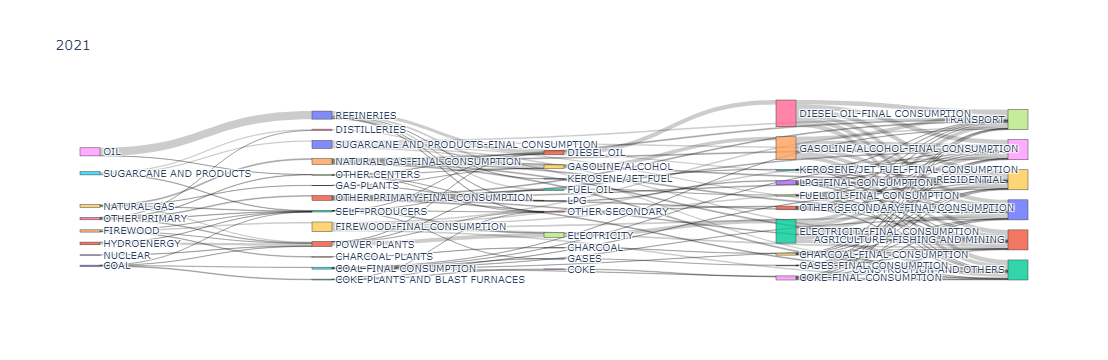

In [60]:
Plot(sheet_name, label, source, target, value)


## II. DATA ANALYSIS CONSUMPTION




**Antonio's notes:**

Pronosticar y analizar consumos energéticos:

 -Balance Eurostat
 
 -Balance España
 
Desagregar el consumo por destino

Evolución de los consumos:

 -Patrón
 
 -Correlaciones
 
 -Tipos de consumo
 
 -Relación entre Incremento económico (ciclos económicos de crecimiento)
 
                          Incremento consumo energético
                          
Análisis integrado con todos los consumos y ver si el abastecimiento, es decir, la oferta.

Validar los "nan" de cada fuente primaria de Brasil

Evaluar la industrialización de Brasil a futuro para ver como va a influir en su consumo

¿Es exportador de energía Brasil?

Pérdidas de energía eléctrica por distribución

Capacidad operativa de energía hidroeléctrica por las capacidades hídricas de los ríos


**Edu's notes:**

Entiendo que nos dice que hay que que ver la evolución del consumo en cuanto a los suministros

Relación oferta y demanda por segmentos en las series temporales

De esa forma también podriamos ver la correlación entre las variables (positivas/negativas) en estas series temporales que en Brasil han influido en la demanda/oferta en los diferentes segementos en las series temporales y así se veria la evolución

En cuanto a los escenarios, no se como plantearlos, se me ocurre algo pero necesito vuestra opinión:

Escenario con un aumento o disminución de la población lo que reflejaría un cambio en el consumo final energético.

Escenario con un aumento o disminución de la economía brasileña y su impacto en el consumo final energético.

Escenario de un desarrollo tecnológico que muestre su impacto en el consumo final energético

In [65]:
df_C=df_summary['FINAL CONSUMPTION']
df_C.head()

YEAR
1970    58834.12
1971    61691.69
1972    65995.12
1973    71692.86
1974    76198.40
Name: FINAL CONSUMPTION, dtype: float64

In [62]:
# Drop the 'FINAL CONSUMPTION' column and calculate the percentages
df_percentages = (df_C.drop(columns=['FINAL CONSUMPTION']).div(df_C['FINAL CONSUMPTION'], axis=0) * 100)
df_percentages = df_percentages.round(0)

df_percentages.tail(20)

KeyError: 'FINAL CONSUMPTION'

In [ ]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_EC.drop(columns=["FINAL CONSUMPTION"])

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [ ]:
data=df_stackplot.copy()

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

data.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

### CORRELATION MATRIX

In [ ]:

list_correlacion=data.columns

In [ ]:
df_correlacion = data[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

In [ ]:
for i in list_correlacion:
    sns.boxplot(x=data[i])
    print(i)
    plt.show()

In [ ]:
def saca_metricas(y_real, y_pred): 
    false_positive_rate, recall, thresholds = roc_curve(y_real, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    print('- AUC: {roc_auc}')
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [ ]:
#models_rcv = {
 #   "XGB": XGBClassifier(n_jobs=-1, n_estimators=30, random_state=1234),
  #  "RF": RandomForestClassifier(n_estimators =30, n_jobs=-1, random_state=1234),
  #  "Tree": DecisionTreeClassifier(random_state=1234),
  #  "Log": LogisticRegression(solver="newton-cg", penalty="l2"),
#}

def rskf_comparison(models, X_train, y_train):
    
    results = []
    names = []

    for k, v in models.items():
    
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234) 
        cv_scores = cross_val_score(v, X_train, y_train, scoring='roc_auc', cv=rskf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('CV AUC: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-------------------------')
        
    
    return(results, names)


#results, names = rskf_comparison(models_rcv, X_train, y_train)
#plt.figure(figsize=(10, 6))
#comparison = plt.boxplot(results)
#plt.xticks(np.arange(1,len(names)+1),names)
#plt.show(comparison)

In [ ]:
#grid_param = {
#    'n_estimators': [100,300,500],
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [16,20,22,24],
#    'max_features': ['auto', 'sqrt'],

#}

When dealing with time series prediction problems, some **suitable models** are :

Autoregressive Integrated Moving Average (ARIMA)

Seasonal Autoregressive Integrated Moving-Average (SARIMA):

Seasonal Decomposition of Time Series (STL)

Exponential Smoothing (ETS)

Long Short-Term Memory (LSTM)

Gated Recurrent Units (GRU)

Convolutional Neural Networks (CNNs)

**Here's a high-level outline of how you might approach creating such a pipeline:**

### 1. Data Preparation:

Load and preprocess your time series data.
Convert the target variable to numerical values if needed.
### 2. Model Selection:

Define a list of time series forecasting models you want to consider (ARIMA, SARIMA, STL, ETS, LSTM, GRU, CNNs).
Define hyperparameters for each model, if applicable.

### 3. Pipeline Creation:

For each model in the list, create a separate pipeline that includes data preprocessing, model fitting, and prediction.

### 4.Model Evaluation:

Use appropriate time series evaluation metrics (e.g., Mean Squared Error, Root Mean Squared Error, Mean Absolute Error) to evaluate the performance of each model on a validation set.

### 5. Model Selection:

Compare the performance metrics of each model to identify the best-performing model.
Select the model with the lowest error or the best fit for your problem.

### 6. Fine-Tuning and Validation:

If needed, perform hyperparameter tuning on the selected model using techniques like grid search or random search.
Validate the tuned model on a separate test set to ensure its generalization performance.

### 7. Final Model and Deployment:

Once you have identified the best model, train it on the entire dataset (including training and validation data).
Deploy the final model for making predictions on new data.

### 1. Data Preparation:

In [ ]:
#Load data of economy
economic_demographic_data = pd.read_excel('../datas/Brasil_indices.xlsx', index_col='Año')

cols=economic_demographic_data.columns
print(cols)

In [ ]:
economic_demographic_data.shape

In [ ]:
economic_demographic_data.tail(20)

In [ ]:
selected_cols=cols[:6]

In [ ]:
df1=economic_demographic_data[selected_cols]

In [ ]:
data=df_EC
#Merge data
merged_df = data.merge(df1, left_index=True, right_index=True)

# Convertir el índice a tipo entero 
merged_df.index = merged_df.index.astype(int)
# Imprimir el DataFrame unido para verificar
merged_df.columns

In [ ]:
#Convert cols to English
merged_df.rename(columns={'Población':'POPULATION','PIB': 'GDP',
                          'Crecimiento población anual': 'ANNUAL POPULATION GROWTH',
                          'Tasa de natalidad': 'BIRTH RATE',
                          #'Tasa inflacion': 'INFLATION RATE',
                          'Tasas de muerte/1000 personas': 'DEATH RATES PER 1000 PEOPLE'}, inplace=True)

In [ ]:
merged_df.head()

In [ ]:
SECTORS=['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC', 'INDUSTRIAL', 'NON-ENERGY CONSUMPTION',
       'RESIDENTIAL', 'TRANSPORT', 'FINAL CONSUMPTION']

In [ ]:
FEATURES=['POPULATION',
       'GDP', 'ANNUAL POPULATION GROWTH', 'BIRTH RATE', #'INFLATION RATE',
       'DEATH RATES PER 1000 PEOPLE']


missing_values=merged_df.isnull().sum()
missing_values

## MinMaxScaler
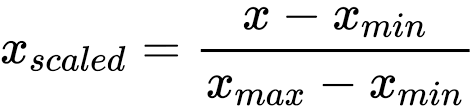

In [ ]:
merged_df.head()

In [ ]:
merged_df.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df)
scaled_df = pd.DataFrame(scaled_data, columns=merged_df.columns)
scaled_df.set_index(merged_df.index, inplace=True)

In [ ]:
scaled_df

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten

import tensorflow


# Assuming you have a DataFrame named df with a target column
target='FINAL CONSUMPTION'


# Split data into train and test sets 
train_size = int(len(merged_df) * 0.80)
# data without scaling
#train, test = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

#data scaling:
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]


#X_train = train[FEATURES].values.reshape((-1, len(FEATURES), 1))
#X_test = test[FEATURES].values.reshape((-1, len(FEATURES), 1))

X_train = train[FEATURES]
X_test = test[FEATURES]
y_train=train[target]   
y_test=test[target]

combined_index = np.concatenate((train.index.values, test.index.values), axis=0)
combined_index
train

In [ ]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def Execute_model(model_name,test,train, X_train, X_test, y_train, y_test, FEATURES, target):
    if model_name in ["ARIMA","SARIMA", "ETS"]:
        # Initialize the model with appropriate parameters
        if model_name == "ARIMA":
            model = ARIMA(endog=y_train, order=(5, 1, 0))
        
        if model_name == "SARIMA":
            model = SARIMAX(endog=y_train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
        elif model_name == "ETS":
            model = ExponentialSmoothing(endog=y_train, seasonal='add', seasonal_periods=12)
            
        # Fit the model
        fit_model = model.fit()
        y_pred = fit_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

    if model_name in ["LSTM", "GRU", "CNNs"]:
        # Create and compile the deep learning models
        model = Sequential()

        if model_name == "LSTM":
            model.add(LSTM(50, input_shape=(len(FEATURES), 1), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(50, input_shape=(len(FEATURES), 1), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(50, return_sequences=False))  # Add another LSTM layer with return_sequences=True
            model.add(Dense(1))
        elif model_name == "GRU":
            model.add(GRU(50, input_shape=(len(FEATURES), 1), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(GRU(50, input_shape=(len(FEATURES), 1), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(GRU(50, input_shape=(len(FEATURES), 1), return_sequences=False))
     
            model.add(Dense(1))
        elif model_name == "CNNs":
            model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
            model.add(Dropout(0.2))  # Agregar dropout para evitar overfitting
            model.add(Dense(64, activation='relu'))
            model.add(Dense(1, activation='linear'))
        #elif model_name == "CNN":
         #   model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(FEATURES), 1)))
          #  model.add(MaxPooling1D(pool_size=2))
           # model.add(Flatten())

        
        model.compile(optimizer='adam', loss='mse')

        # Convert data types to float64
        X_train = X_train.values.astype('float64')
        X_test = X_test.values.astype('float64')

        # Reshape input data for deep learning models
        X_train = X_train.reshape((-1, len(FEATURES), 1))
        X_test = X_test.reshape((-1, len(FEATURES), 1))

        # Ensure y_train and y_test are float64
        y_train = y_train.astype('float64')
        y_test = y_test.astype('float64')

        # Fit the model
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Make predictions
        y_pred = model.predict(X_test).flatten()

    # Calculate mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #rmse= sqrt(abs(y_test-y_predic))
    
    # Calculate R-squared (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    # Define the Plot function within Execute_model
    def Plot(train=train, test=test,X_test=X_test, y_test=y_test, y_pred=y_pred):
        combined_index = np.concatenate((train.index, test.index), axis=0)
        combined_y_pred = np.concatenate((y_train, y_pred), axis=0)
        combined_y_test = np.concatenate((y_train, y_test), axis=0)
        
        plt.figure(figsize=(10, 6))
        
        plt.plot(combined_index, combined_y_pred, label='Predicted')
        plt.plot(combined_index, combined_y_test, label='Actual')
        plt.title(f'Actual and Predicted data of model {model_name} with rmse={rmse:.2f}, R-squared={r2:.2f}')
        plt.xlabel("Year")
        plt.ylabel(target)
        plt.legend()
        plt.grid(True)
        plt.show()
 
    # Call the Plot function
    #Plot(X_test, y_test, y_pred)

  
    results={"model_name":model_name, "rmse":rmse, "y_pred":y_pred, "R-squared": r2, "Plot": Plot()}
    
    return results


In [ ]:
columns=["SECTOR", "model_name", "RMSE"]
df_BEST_MODELS=pd.DataFrame(columns= columns)
for target in SECTORS: 
    
    # Split data into train and test sets 
    train_size = int(len(scaled_df) * 0.80)
    train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]  
    X_train = train[FEATURES]
    X_test = test[FEATURES]
    y_train = train[target]   
    y_test = test[target]
    
    models=["ARIMA","SARIMA", "ETS","LSTM", "GRU","CNNs"]
    results=[]
    for model_name in models:
        res=Execute_model(model_name=model_name,test=test,train=train, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, FEATURES=FEATURES, target=target)
    
        results.append(res)
    
    #best_accuracy=max(result['Accuracy'] for result in results)
    min_rmse = min(result['rmse'] for result in results)
    best_model = next(result['model_name'] for result in results if result['rmse'] == min_rmse)   
    result_dict = {'SECTOR': target, 'model_name': best_model, 'RMSE': f"{min_rmse:.2f}"}
    df_BEST_MODELS = pd.concat([df_BEST_MODELS, pd.DataFrame([result_dict])], ignore_index=True)
    
    

    

In [ ]:
df_BEST_MODELS

# Predict for 20 more years:

Use the best model for each sector to predict then sum the values of all sectors to obtain the final consumption. We will do step by step as folowing:

### Step 1: Extend the time series data for 20 more years
Creating the extended data when it will happen in the future might involve a different approach compared to creating it with historical data. In this case, you won't have the actual future values to include in your extended data.

One approach is to make use of the predictions from your selected best models to generate a forecast for the next 20 years. 

In [ ]:
# Create an extended DataFrame to store the forecasted data
extended_data = scaled_df.copy()
extended_data.tail()

In [ ]:
extended_data.columns[-6:]

In [ ]:
# Step 1: Extend the time series data for 20 more years
extended_years = 20
extended_data = ...  # Create a new DataFrame with 20 more years of data

# Step 2: Retrieve Best Models for Each Sector
best_models = {}
for target in SECTORS:
    best_model_row = df_BEST_MODELS[df_BEST_MODELS['SECTOR'] == target].iloc[0]
    best_models[target] = best_model_row['model_name']

# Step 3: Retrain Best Models with Extended Data
extended_results = {}
for target, best_model_name in best_models.items():
    train_size = int(len(scaled_df) * 0.80)
    train, _ = scaled_df.iloc[:train_size], scaled_df
    X_train = train[FEATURES]
    y_train = train[target]

    # Retrain the best model using the extended data
    extended_X_train = extended_data[FEATURES]
    extended_y_train = extended_data[target]
    extended_result = Execute_model_with_optimization(extended_data, train, extended_X_train, extended_X_train, extended_y_train, extended_y_train, FEATURES, target)
    extended_results[target] = extended_result

# Step 4: Make Predictions for Extended Period
for target, result in extended_results.items():
    best_model = best_models[target]
    best_model_name = result['model_name']
    best_model_rmse = result['rmse']
    extended_y_pred = result['y_pred']

    # Print or process the extended predictions for the next 20 years
    print(f"Predictions for {target} using {best_model_name} (RMSE: {best_model_rmse:.2f}):")
    print(extended_y_pred)